# Control charts and probabilities when standard deviation and expectation are known

Supplier of rice spices hyssop spice in boxes, in an automatic packing process
The engineers proposed to control the process with the help of control charts for averages and standard deviations, for measuring the weight of the boxes.
Every half hour a sample of 5 boxes was taken
It is known that the weight of hyssop is normally distributed with an average of 100 grams and a standard deviation of 5 grams
The following are the measurement results of 15 samples on a given working day

In [273]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import statistics

df = pd.read_csv('Data for control chart for variables Parameters are known.csv', index_col=0)

In [274]:
df.dtypes


Average               float64
Standard Deviation    float64
dtype: object

In [275]:
df

,Average,Standard Deviation
Sampel,,
1,100.3,1.0
2,102.0,2.0
3,101.0,1.5
4,102.5,1.3
5,105.0,4.4
6,103.7,1.1
7,108.0,6.1
8,101.0,2.0
9,98.0,7.2


In [276]:
N = 5               # The sample size
E = 100             # Eepected value
STD_0 = 5           # Standard Deviation


A = 3/math.sqrt(N)


UCL = E + (A*STD_0) # Upper control limit
LCL = E - (A*STD_0) # Lower control limit


STD_X = STD_0/math.sqrt(N) # Standard Deviation of sampeling

In [277]:
UWL = UCL - STD_X
UL =  UCL - (2*STD_X)

LWL = LCL + STD_X
LL =  LCL + (2*STD_X)

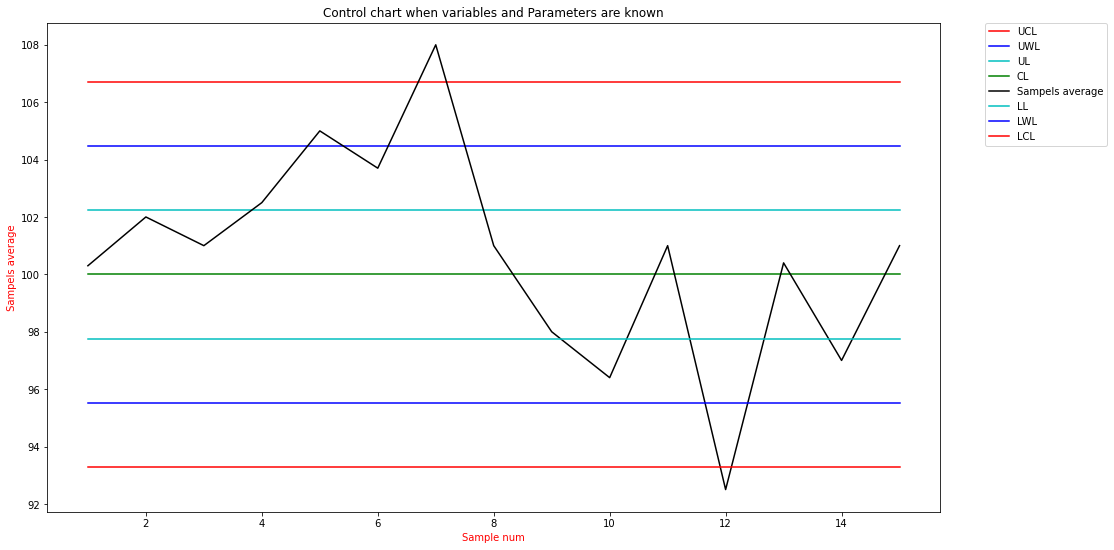

In [278]:
plt.plot( df.index.values , (np.ones(15)*UCL) ,  label = 'UCL' , color = 'r')
plt.plot( df.index.values , (np.ones(15)*UWL) ,  label = 'UWL',  color = 'b' )
plt.plot( df.index.values , (np.ones(15)*UL) ,   label = 'UL' , color = 'c')

plt.plot( df.index.values , (np.ones(15)*E) ,   label = 'CL', color = 'g')
plt.plot( df.index.values , (df['Average']) ,    label = 'Sampels average', color = 'k')

plt.plot( df.index.values , (np.ones(15)*LL) ,   label = 'LL'  , color = 'c')
plt.plot( df.index.values , (np.ones(15)*LWL) ,  label = 'LWL' , color = 'b')
plt.plot( df.index.values , (np.ones(15)*LCL) ,  label = 'LCL' , color = 'r')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel(' Sampels average ', color = 'r' )
plt.title('Control chart when variables and Parameters are known')
plt.xlabel( 'Sample num', color = 'r' )


plt.show()

 
 # Probability of finding changes in data
 

If suddenly there is a change and the average weight drops to 95 g, what is the probability
Find out with the help of the control chart for averages at most in the sample
The second to be taken after the change?
What is the average runtime to find out that the process has gone out of control?

In [279]:
new_avg = 95
z = ((LCL-new_avg)/STD_X)
p = stats.norm.cdf(z)
q = 1-p

In [280]:
# Probability function of num of sampels before detection

In [281]:
def detection_in_the_x_sample(x):
    if x == 1:
        return p
    else:
        q = 1-p
        return (q * detection_in_the_x_sample(x-1))

In [282]:
detection_in_the_x_sample(1)

0.22245387659359545

Text(92.89500000000021, 0.01, '0.111')

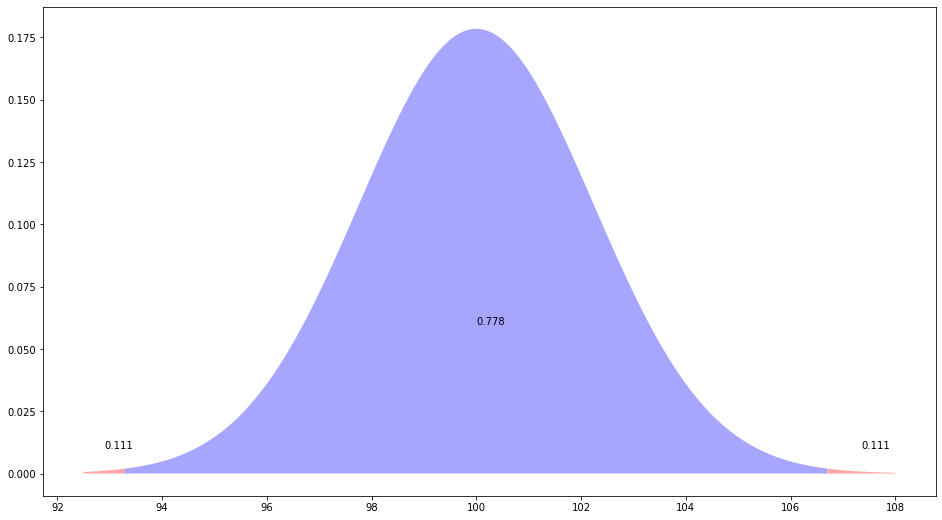

In [283]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (16,9)

x_axis1 = np.arange(df['Average'].min(),LCL,0.01)
x_axis2 = np.arange(LCL,UCL,0.01)
x_axis3 = np.arange(UCL,df['Average'].max(),0.01)

                                  
plt.fill_between(x = x_axis1, 
                 y1= stats.norm.pdf(x_axis1,E,STD_X),
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x = x_axis3, 
                 y1= stats.norm.pdf(x_axis3,E,STD_X),
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x = x_axis2 , 
                 y1= stats.norm.pdf(x_axis2,E,STD_X),
                 facecolor='blue',
                 alpha=0.35)

plt.text(x = np.mean(x_axis3), y=0.01, s= round(((stats.norm.cdf(z)) / 2),3))
plt.text(x = np.mean(x_axis2), y=0.06, s= round((1 - (stats.norm.cdf(z))),3))
plt.text(x = np.mean(x_axis1), y=0.01, s= round(((stats.norm.cdf(z)) / 2),3))

In [284]:
detection_in_the_x_sample(2)

0.17296814938207683

In [285]:
# Probability of detection at most in the second sample

In [286]:
def detection_at_most_in_the_x_sample(x):
    if x == 1:
        return detection_in_the_x_sample(x)
    else:
        return (detection_in_the_x_sample(x) + detection_at_most_in_the_x_sample(x-1))


In [287]:
detection_at_most_in_the_x_sample(2)

0.3954220259756723

The average of the runs will be:
On average in the first or second sample the change that occurred in the process average will be detected for the first time

In [288]:
ARL1 = 1/(1-q)

In [289]:
ARL1

4.495313883996348

If following a change the average weight increases, how much is it increased if it is known that
The probability of discovering this at the latest after the second sample is taken
Is 0.09
(? Assume detection capability only on the upper control limit side).

In [290]:
def how_nuch_increased_when_proba_of_discovering_id_known(prob_find_out_2_max_sampels):
    a =1
    b=-2
    c = prob_find_out_2_max_sampels
    
    discriminant = b**2 - (4 * a * c)

    if discriminant >= 0:
        x_1=(-b+math.sqrt(discriminant))/2*a
        x_2=(-b-math.sqrt(discriminant))/2*a
        
        
    if x_1>0 and x_1<1:
        new_avg1 = ((UCL-(STD_X*stats.norm.cdf(1-x_1))))
        return (round(new_avg1,4))
    else:
        new_avg1 = ((UCL-(STD_X*stats.norm.cdf(1-x_2))))
        return(round(new_avg1,4))

In [291]:
how_nuch_increased_when_proba_of_discovering_id_known(0.09)

104.8524

3) The standard deviation increased to 7 g and the average remained constant
Visible probability outside the upper control limit

In [292]:
new_std = 7
p3 = 2*(1- stats.norm.cdf((UCL-E)/(new_std/math.sqrt(5))))

round(p3,3)

0.032

4) If there is an increase in the average weight of a box to 103.2g, what
The probability of discovering it in the second sample? What will be the run time
The average to detect the deviation?

In [293]:
new_avg4 = 103.2

p4 = 1- stats.norm.cdf((UCL-new_avg4)/(STD_X))

prob_to_find_in_the_second_sample = p4*(1-p4)

ARL1_5 = 1/prob_to_find_in_the_second_sample

round(ARL1_5,3)  

18.205

In [294]:
# On average in sample 18 Or the 19th the change of the average will be discovered for the first time

5) After the process is back in a state of control, the plant decides
Increase the chance of detecting a state of deviation and therefore "tightens" the boundaries
Control by 4 g on each side. What is the chance of a "false alarm" in case and how much
Will average runs happen until a "false alarm"?

In [295]:
new_ucl = UCL - 4
new_lcl = LCL + 4
alfa = 1 - ((stats.norm.cdf((new_ucl-E)/STD_X)) - (stats.norm.cdf((new_lcl-E)/STD_X)))

alfa #the chance of a "false alarm"

0.2258396006338852

In [296]:
ARL0_5 = 1/alfa

ARL0_5 # average runs happen until a "false alarm"

4.427921397280221

6) If there is an average downward deviation (when measured in standard deviations), 
 K = 1.5, what is the probability of discovering this only in the third sample? And what time
The average run to discovery?

In [297]:
def quastion5(k):
    
    beta5 = (stats.norm.cdf(3 - (k*math.sqrt(N)))) - (stats.norm.cdf(-3 - (k*math.sqrt(N))))
    return beta5

In [298]:
round(quastion5(1.5),3) #The probability of non-discovery

0.362

In [299]:
def prob_to_find_out_at_the_x_sample_by_giving_k(x,k):
    
    beta5 = (stats.norm.cdf(3 - (k*math.sqrt(N)))) - (stats.norm.cdf(-3 - (k*math.sqrt(N))))
    
    ARL1_5 = 1/(1-beta5)
    
    return (print(

    "prob not to find out in a sample", round(beta5,3),"\n"
    "prob_to_find_out_at_the_x_sampl" ,round(pow(beta5,x-1)*(1-beta5),3),"\n"
    "average_num_of_runs ", round(ARL1_5,3)))

In [300]:
prob_to_find_out_at_the_x_sample_by_giving_k(3,1.5)

prob not to find out in a sample 0.362 
prob_to_find_out_at_the_x_sampl 0.083 
average_num_of_runs  1.566
